In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

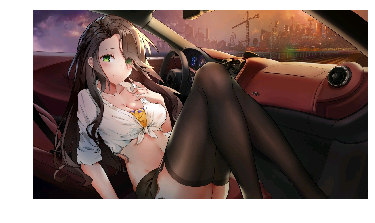

(844, 1500, 3)


In [9]:
myimg = mpimg.imread('test.jpg')
plt.imshow(myimg)
plt.axis("off")
plt.show()
print(myimg.shape)

In [10]:
im_height = myimg.shape[0]
im_weith = myimg.shape[1]
im_channels = myimg.shape[2]

full = np.reshape(
    myimg, 
    [1, im_height, im_weith, im_channels]
)
inputfull = tf.Variable(
    tf.constant(
        1.0, 
        shape=[1, im_height, im_weith, im_channels]
    )
)

filter1 = tf.Variable(
    tf.constant(
        [
            [-1.0, -1.0, -1.0],
            [0, 0, 0],
            [1.0, 1.0, 1.0],
            [-2.0, -2.0, -2.0],
            [0, 0, 0],
            [2.0, 2.0, 2.0],
            [-1.0, -1.0, -1.0],
            [0, 0, 0],
            [1.0, 1.0, 1.0]
        ],
        shape=[3, 3, 3, 1]
    )
)

op = tf.nn.conv2d(inputfull, filter1, strides=[1, 1, 1, 1], padding="SAME")

o = tf.cast(
    ((op - tf.reduce_min(op)) / (tf.reduce_max(op) - tf.reduce_min(op))) * 255, tf.uint8
)

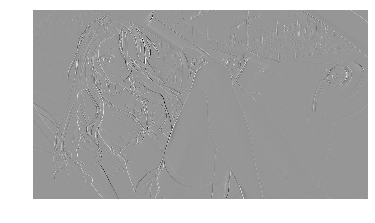

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    t, f = sess.run([o, filter1], feed_dict={inputfull: full})
    t = np.reshape(t, [im_height, im_weith])
    
    plt.imshow(t, cmap='Greys_r')
    plt.axis('off')
    plt.show()